In [2]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

cargamos los datos para trabajar

In [6]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

tenemos que normalizar los datos de 0 - 1

In [7]:
mean = train_data.mean(axis = 0)
train_data  = train_data - mean
std = train_data.std(axis = 0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

Creacion del modelo de regresion

In [18]:
def build_model_regresion(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation= 'relu', input_shape = (input_data,)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer = optimizers.RMSprop(lr = lr_var), loss = 'mse', metrics = ['mae'])
  return model

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_history = []

In [20]:
for i in range(k):
  print("Fold:", i)
  val_data = train_data[i * num_val_samples : (i +  1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples : (i +  1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]
       ],
      axis = 0)

  partial_train_targets= np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i + 1) * num_val_samples:]
       ],
      axis = 0)

  model = build_model_regresion(0.001, 13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs = num_epochs,
                      batch_size = 16,
                      validation_data = (val_data, val_targets),
                      verbose = 0)
  all_history.append(history.history['val_mae'])

Fold: 0


Fold: 1


Fold: 2


Fold: 3


In [21]:
all_mae_avg = pd.DataFrame(all_history).mean(axis = 0)

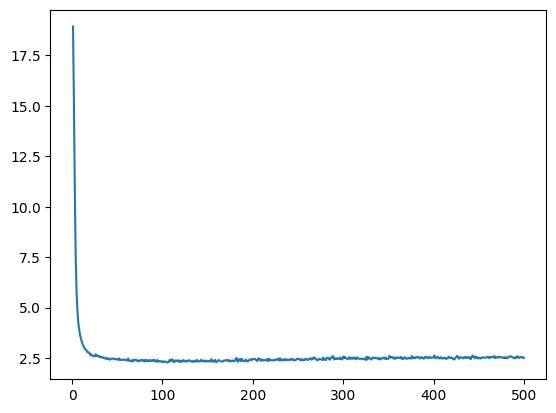

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(all_mae_avg) + 1), all_mae_avg)
plt.show()
